# III. CLUSTERING OF HANDWRITTEN DIGITS



# A. K-means clustering

K-means clustering is a technique of unsupervisioned learning that is often used in Machine Learning Models. The ideia is to group different points by creating clusters. These clusters refers to collection of points aggregated together because of a given similarity. Then, we iteratively move the center of these clusters according to a specific metric to minimize the total variance between clusters.

In [110]:
# Importing libraries

import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import sklearn
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import scipy

- Each column with headers from 0 to 63 represents a pixel (in total 64 pixels) with values of intensity between 0 and 16. 
- The LAST column with header 64 represents the label of our digit (a number from 0 to 9)

In [111]:
# Reading data

test = pd.read_csv('test.tes',sep=' ',delimiter=',',header = None)
pd.set_option('display.max_columns', 100)
display(test[0:10])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,13,15,10,15,5,0,0,3,15,2,0,11,8,0,0,4,12,0,0,8,8,0,0,5,8,0,0,9,8,0,0,4,11,0,1,12,7,0,0,2,14,5,10,12,0,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,0,11,16,9,0,0,0,0,3,15,16,6,0,0,0,7,15,16,16,2,0,0,0,0,1,16,16,3,0,0,0,0,1,16,16,6,0,0,0,0,1,16,16,6,0,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,3,16,15,14,0,0,0,0,8,13,8,16,0,0,0,0,1,6,15,11,0,0,0,1,8,13,15,1,0,0,0,9,16,16,5,0,0,0,0,3,13,16,16,11,5,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,13,6,15,4,0,0,0,2,1,13,13,0,0,0,0,0,2,15,11,1,0,0,0,0,0,1,12,12,1,0,0,0,0,0,1,10,8,0,0,0,8,4,5,14,9,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,0,7,8,0,0,0,0,0,1,13,6,2,2,0,0,0,7,15,0,9,8,0,0,5,16,10,0,16,6,0,0,4,15,16,13,16,1,0,0,0,0,3,15,10,0,0,0,0,0,2,16,4,0,0,4
5,0,0,12,10,0,0,0,0,0,0,14,16,16,14,0,0,0,0,13,16,15,10,1,0,0,0,11,16,16,7,0,0,0,0,0,4,7,16,7,0,0,0,0,0,4,16,9,0,0,0,5,4,12,16,4,0,0,0,9,16,16,10,0,0,5
6,0,0,0,12,13,0,0,0,0,0,5,16,8,0,0,0,0,0,13,16,3,0,0,0,0,0,14,13,0,0,0,0,0,0,15,12,7,2,0,0,0,0,13,16,13,16,3,0,0,0,7,16,11,15,8,0,0,0,1,9,15,11,3,0,6
7,0,0,7,8,13,16,15,1,0,0,7,7,4,11,12,0,0,0,0,0,8,13,1,0,0,4,8,8,15,15,6,0,0,2,11,15,15,4,0,0,0,0,0,16,5,0,0,0,0,0,9,15,1,0,0,0,0,0,13,5,0,0,0,0,7
8,0,0,9,14,8,1,0,0,0,0,12,14,14,12,0,0,0,0,9,10,0,15,4,0,0,0,3,16,12,14,2,0,0,0,4,16,16,2,0,0,0,3,16,8,10,13,2,0,0,1,15,1,3,16,8,0,0,0,11,16,15,11,1,0,8
9,0,0,11,12,0,0,0,0,0,2,16,16,16,13,0,0,0,3,16,12,10,14,0,0,0,1,16,1,12,15,0,0,0,0,13,16,9,15,2,0,0,0,0,3,0,9,11,0,0,0,0,0,9,15,4,0,0,0,9,12,13,3,0,0,9


In [112]:
# Separating the labels

test_labels=test[64]

In [113]:
# Taking the numpy value

test_labels=test_labels.values

In [114]:
# Dropping the labels from the original dataset

test = test.drop([64],axis=1)

Setting the mean=0 and variance =1

In [115]:
from sklearn.preprocessing import StandardScaler

testN=StandardScaler().fit_transform(test) # Normalizing each feature to mean = 0 and variance = 1

Using the scikit library we are able to use the K-means function directly, let's initializate the K-means with: 
- Random initialization.
- N_cluster = 10 clusters.
- We will choose as n_init=1 the number of time the K-means algorithm will be run with different centroid seeds. The final result normally is the best output of n_init consecutive runs in terms of inertia.

We'll apply 10 times the K-means clustering technique and analyse what happens

In [116]:
Vector = [] # in Vector we'll append the K-means with different initializations
Inertia = [] # in Inertia we'll append the inertia values for each one of the K-means that we applied
Support = []
Labels = []
for k in range(10):
    Kmeans=sklearn.cluster.KMeans(n_clusters=10,init='random',n_init=1).fit(testN) # Applying the K-means
    Vector.append(Kmeans)
    Inertia.append(Kmeans.inertia_)
    Support.append(k)
    Labels.append(Kmeans.labels_)
    print('The Inertia value for the K-means',k,'is: ',Inertia[k])
    
print('####################################################################################')

Inertia=np.array(Inertia)
Labels =np.array(Labels)
idx_min= np.where(Inertia == Inertia.min())
print('The best K-means technique is the one that retains the lowest inertia, in our case, for iteration',int(idx_min[0]),'with a Inertia of',Inertia.min())

Best_Result=Vector[int(idx_min[0])] # Here, we keep the best result from the 10 K-means that we just applied
label_BR = Labels[int(idx_min[0])] # Here we keep the label for the best result

The Inertia value for the K-means 0 is:  69672.395565258
The Inertia value for the K-means 1 is:  71479.03636845524
The Inertia value for the K-means 2 is:  71471.16834364567
The Inertia value for the K-means 3 is:  70958.56383190767
The Inertia value for the K-means 4 is:  71887.78198781227
The Inertia value for the K-means 5 is:  72300.99917721793
The Inertia value for the K-means 6 is:  70787.0457688118
The Inertia value for the K-means 7 is:  71826.62089422632
The Inertia value for the K-means 8 is:  69527.95621365473
The Inertia value for the K-means 9 is:  72017.43911137461
####################################################################################
The best K-means technique is the one that retains the lowest inertia, in our case, for iteration 8 with a Inertia of 69527.95621365473


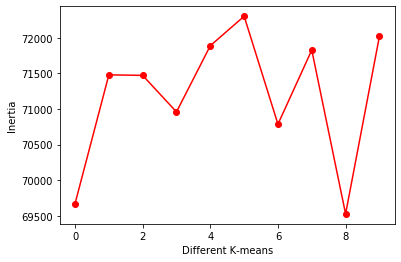

In [117]:
plt.plot(Support,Inertia,'ro-')
plt.xlabel('Different K-means')
plt.ylabel('Inertia')
plt.show()

As we can see above by the graphic and the numbers of inertia is that each time that we initializate the same algorithm randomly a different inertia value is obtained, it means that it depends on the initial value as expected. In the following part we'll calculate the score of these same K-means and search for a correlation between Inertia and Score.

#################################################################################################################

Now, we'll consider the labels to verify the accuracy of this clustering method. As score, we'll take the fraction of pairs of samples that are correctly partitioned: two samples are considered correctly partitioned if they are in the same cluster and
have same the label or if they are in different clusters and have different labels.

In [118]:
def Score(test_labels,model_labels):
    
    '''the fraction of pairs of samples that are correctly partitioned: 
    two samples are considered correctly partitioned if they are in the same cluster and 
    have same the label or if they are in different clusters and have different labels.
    
    to return the score:
    - multiplied by 2 because of the 2 samples that we compare each time
    - multiplied by 100 to get a percentage value
    '''
    
    tot = len(test_labels)
    accum=0
    
    for tei in range(0,tot):
    
        for toi in range(tei+1,tot):
        
            if test_labels[tei] == test_labels[toi] and model_labels[tei]==model_labels[toi]:
                accum=accum+1
            if test_labels[tei] != test_labels[toi] and model_labels[tei]!=model_labels[toi]:
                accum=accum+1
                
    return(2*100*accum/(tot*(tot-1)))


In [119]:
print('The Score for the Best Clustering Result (minimum inertia) that we obtained is' ,Score(test_labels,label_BR),'%')

The Score for the Best Clustering Result (minimum inertia) that we obtained is 89.15186533358617 %


Let's now calculate for ALL of the 10 K-means clusterings that we applied.

In [120]:
Scores=[]
for k in range(10):
    Scores.append(Score(test_labels,Labels[k]))
    print('The Score value for the K-means',k,'is: ',Scores[k])

The Score value for the K-means 0 is:  91.36131364697162
The Score value for the K-means 1 is:  89.33820658781711
The Score value for the K-means 2 is:  88.60442980319836
The Score value for the K-means 3 is:  89.33585175986208
The Score value for the K-means 4 is:  90.91476390370984
The Score value for the K-means 5 is:  89.68851823070621
The Score value for the K-means 6 is:  90.83693064288043
The Score value for the K-means 7 is:  89.73939490836621
The Score value for the K-means 8 is:  89.15186533358617
The Score value for the K-means 9 is:  92.1985789232983


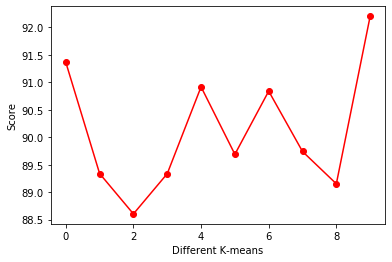

In [121]:
plt.plot(Support,Scores,'ro-')
plt.xlabel('Different K-means')
plt.ylabel('Score')
plt.show()

As we can see, the score also depends on the initial value that we used for the K-means, however, we could not find a direct correlation between the minimum of inertia (best cluster) and the bigger score.

#################################################################################################################



We can also ask ourselves of what is going to happen with different values of K, can we infer that the digits fall into K = 10 categories if we do not have this informationbefore-hand?

- By varying the number of clusters that we are willing to use from 1 to 30 we are going to analyse this
- Here we set n_init=50 because we want a good initialization value for a given K-means applied, we are no more interested in veryifing that things depends on the initial value.

In [19]:
Vector1 = [] # in Vector we'll append the K-means with different initializations
Inertia1 = [] # in Inertia we'll append the inertia values for each one of the K-means that we applied
Support1 = []
for i in range(30):
    Kmeans1=sklearn.cluster.KMeans(n_clusters=i+1,init='random',n_init=100).fit(testN)
    Vector1.append(Kmeans1)
    Inertia1.append(Kmeans1.inertia_)
    Support1.append(i)
    

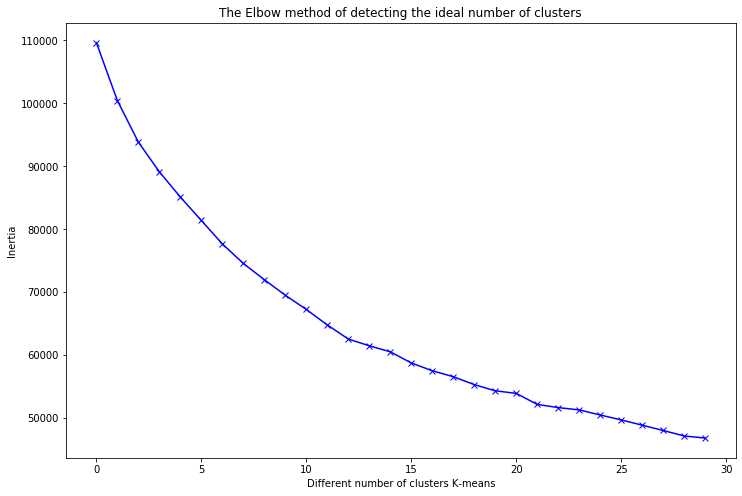

In [18]:
plt.figure(figsize=(12,8))
plt.plot(Support1,Inertia1,'bx-')
plt.xlabel('Different number of clusters K-means')
plt.ylabel('Inertia')
plt.title('The Elbow method of detecting the ideal number of clusters')
plt.show()

Normally, to determine the best number of clusters we have to select the value of k at the point after which the inertia start decreasing in a linear scale. However, in this case it is not natural that we decide as 10 for the ideal number of clusters. Visually, the linear fashion is mostly initializated after 12/13 clusters and not after 10 clusters. We can conclude that it may be difficult to determine the number of clusters if we do not have this value premeditated.

# B. Hierarchical clustering

Hierarchical clustering is another method of grouping data into cluster but this time we ARE NOT dependent on the initial choice of parameters. We are going to use the $\textbf{Agglomerative}$ approach starting from each data point being a cluster and merging clusters iteratively (also called bottom-up approach). There are some characteristic linkage forms that differs by its metrics, in other other, how clusters are grouped to each other:

- Average Linkage: $\frac{1}{\mid C_{1} \mid \mid C_{2} \mid}\sum_{a \in C_{1}} \sum_{b \in C_{2}}d_{ab}$.
- Ward Linkage: Ward's minimum variance criterion $\textbf{minimizes}$ the total within-cluster variance.
- Complete Linkage: $ max(d_{ab} ;  a \in C_{1},b \in C_{2})$
- Single Linkage: $ min(d_{ab} ;  a \in C_{1},b \in C_{2})$



The first thing to do is to separate the data as demanded by taking at random 25 samples labeled as 0, 25 labeled as 1 and 25 labeled as 2.

In [124]:

total_samples = 25
total_digits = 3
stocking = np.zeros((total_digits,total_samples,64))

for k in range(total_digits):
    index = np.random.choice(np.where(test_labels == k)[0], size=total_samples, replace=False)
    
    stocking[k]=testN[index]        
    
# Size before reshaping

display(stocking.shape)

# We need to reshape this stocking matrix to a n x n matrix, only then we will be able to use the dendograms of scikit lib

stocking_new = np.reshape(stocking,(total_samples*total_digits,64))

# Size after reshaping
display(stocking_new.shape)

# Creating a matrix with the labels separetely
label_0 = np.full((1, total_samples), 0)
label_1 = np.full((1, total_samples), 1)
label_2 = np.full((1, total_samples), 2)
label=np.concatenate((label_0, label_1), axis=None)
label=np.concatenate((label,label_2),axis=None)



(3, 25, 64)

(75, 64)

$\textbf{Ward Linkage}$

In [177]:
ward = AgglomerativeClustering(n_clusters = 3,linkage = 'ward',distance_threshold=None).fit(stocking_new)

For this clustering method we'll try to verify visually before using dendograms. Let's take a look below:

In [152]:
print('The predicted cluster is:')
print(ward.labels_)
print('The real labels are:')
print(label)

The predicted cluster is:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 0 2 2
 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 0]
The real labels are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


As we may see above: (OBS: Be careful to DO NOT confuse label i with predicted cluster i)

- The real labels that are $\textbf{0}$ were correctly separated in the predicted cluster $\textbf{1}$
- The real labels that are $\textbf{1}$ were separated in the predicted cluster $\textbf{2}$, but it was often mistaken with the predicted cluster $\textbf{0}$
- The real labels that are $\textbf{2}$ were separated in the predicted cluster $\textbf{0}$, but it was often mistaken with the predicted cluster $\textbf{2}$

Maybe, it would be visible by applying the PCA method.

Let's observe the dendrogram

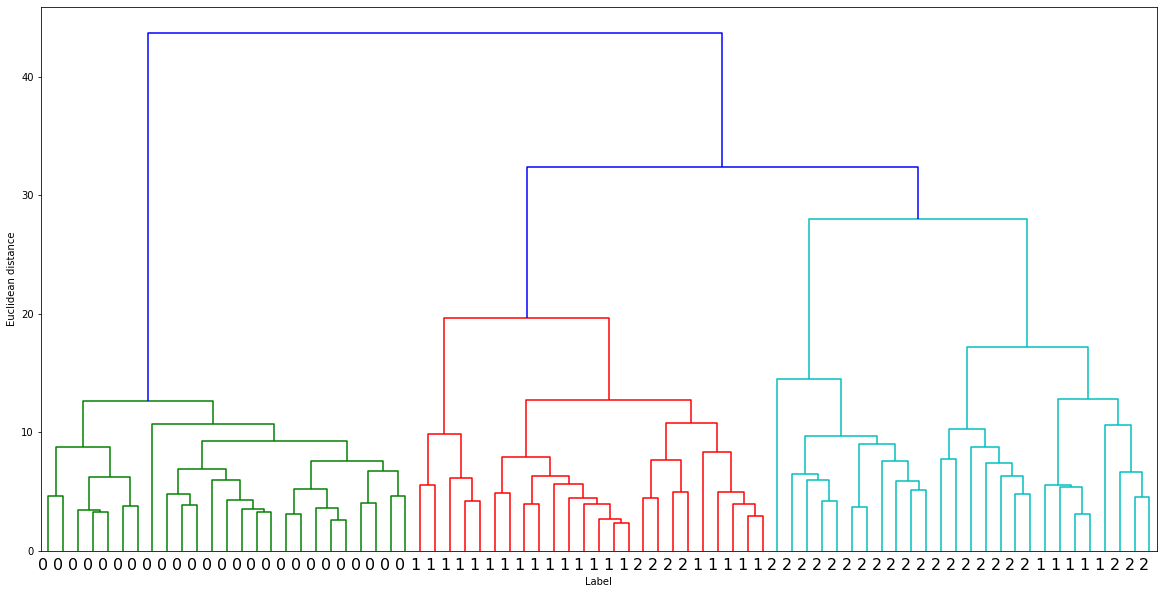

In [170]:
linkage_matrix = linkage(stocking_new, method='ward',metric="euclidean")
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix,labels=label,color_threshold=30)
plt.ylabel('Euclidean distance')
plt.xlabel('Label')
plt.xticks(fontsize=16)
plt.xticks(rotation=360, ha="right")
plt.show()

As we already stated only by a visual description of the data, the dendrogram show that we have three clusters by the ward linkage, The label $\textbf{0}$ is correctly separated from the other two labels.

$\textbf{Average Linkage}$

In [175]:
average = AgglomerativeClustering(n_clusters = 3,linkage = 'average',distance_threshold=None).fit(stocking_new)

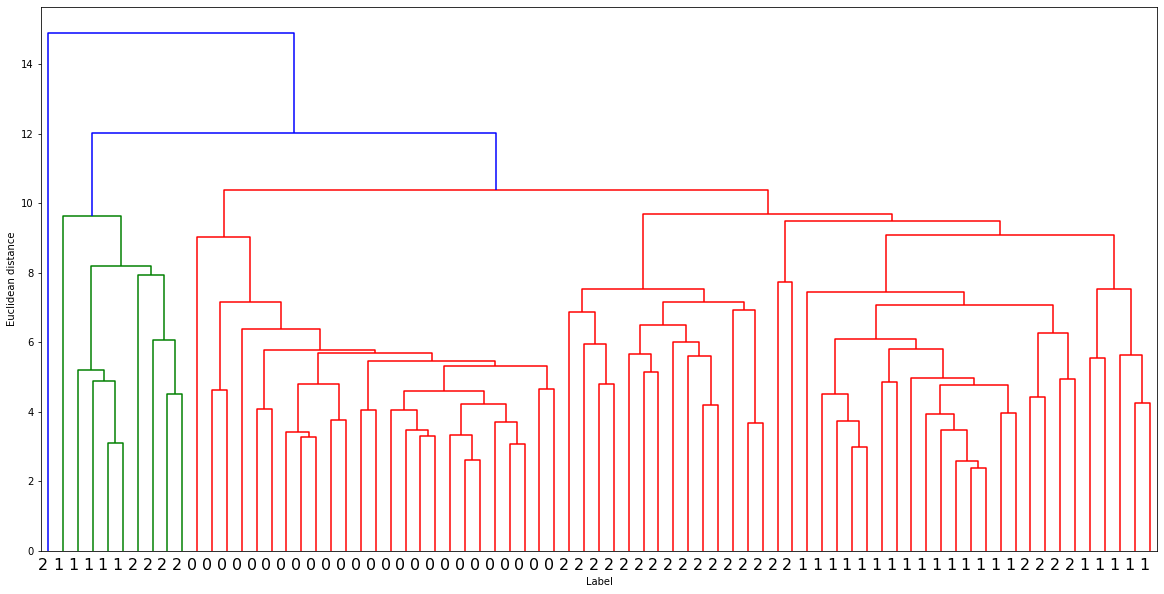

In [180]:
linkage_matrix = linkage(stocking_new, method='average',metric="euclidean")
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix,labels=label)
plt.ylabel('Euclidean distance')
plt.xlabel('Label')
plt.xticks(fontsize=16)
plt.xticks(rotation=360, ha="right")
plt.show()

Here, we applied the Average Linkage. This seems to mix all of the labels in the clustering, it does not seems very profitable of applying. One alternative would to apply a color threshold, the color threshold would help to fix the most important clusters.

$\textbf{Complete Linkage}$

In [174]:
complete = AgglomerativeClustering(n_clusters = 3,linkage = 'complete',distance_threshold=None).fit(stocking_new)

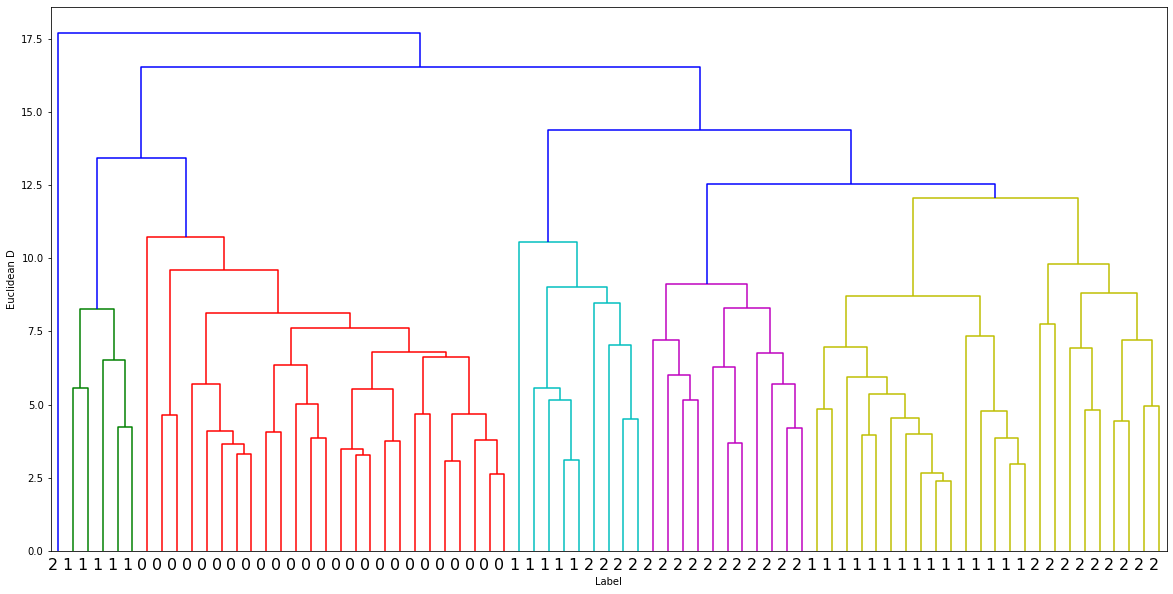

In [171]:
linkage_matrix = linkage(stocking_new, method='complete',metric="euclidean")
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix,labels=label)
plt.ylabel('Euclidean D')
plt.xlabel('Label')
plt.xticks(fontsize=16)
plt.xticks(rotation=360, ha="right")
plt.show()

Here above for complete linkage, we have again the label $\textbf{0}$ well separated in $\textbf{red}$, but it appears that we have more than 3 clusters and in this case we did not set a color threshold.

$\textbf{Single Linkage}$

In [176]:
single = AgglomerativeClustering(n_clusters = 3,linkage = 'single',distance_threshold=None).fit(stocking_new)

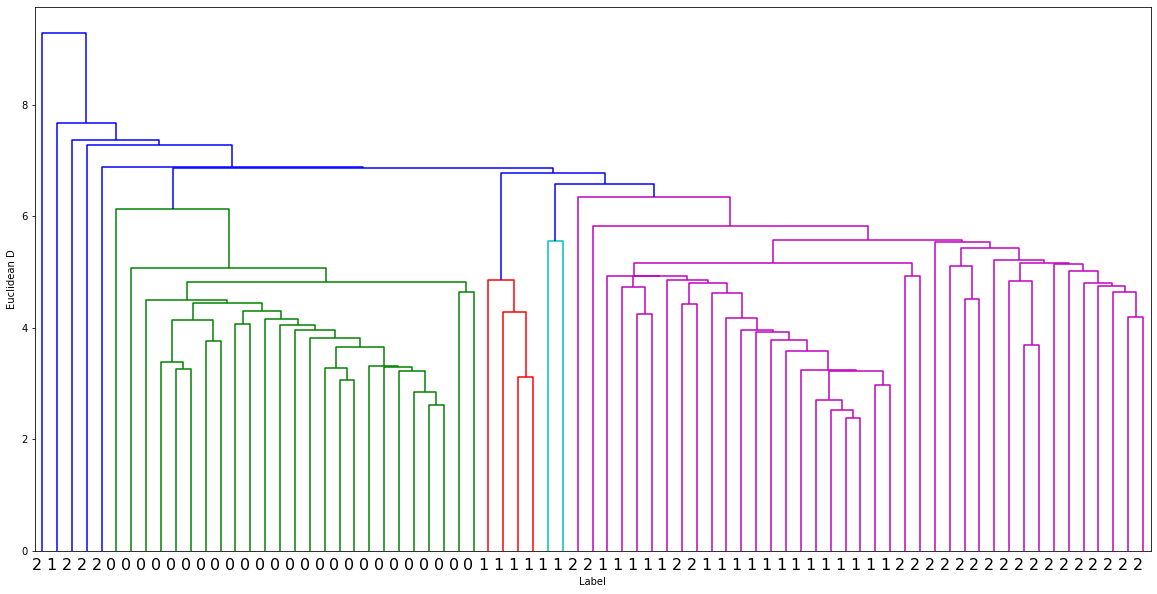

In [168]:
linkage_matrix = linkage(stocking_new, method='single',metric="euclidean")
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix,labels=label)
plt.ylabel('Euclidean D')
plt.xlabel('Label')
plt.xticks(fontsize=16)
plt.xticks(rotation=360, ha="right")
plt.show()

Such as bwefore, we have the label $\textbf{0}$ well separated in $\textbf{green}$, but it appears that we have more than 3 clusters and the labels $\textbf{1 and 2}$ are mixed.

We can try to calculate the score using the function that we defined in the previous exercise for K-means clustering and plot this result.

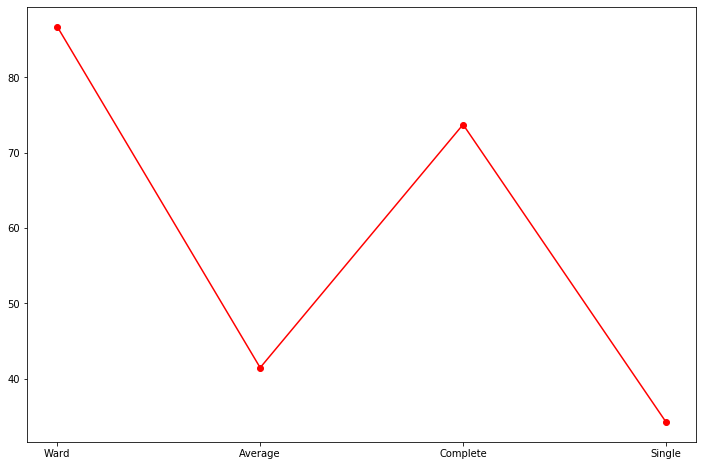

In [184]:
sc = [Score(label,ward.labels_),Score(label,average.labels_),Score(label,complete.labels_),Score(label,single.labels_)]
axis = ['Ward','Average','Complete','Single']
plt.figure(figsize=(12,8))
plt.plot(axis,sc,'ro-')
plt.show()

max_score=(np.array(sc).max())

As a conclusion, we can say that, only the label $\textbf{0}$ was well separated by most of linkage methods. Comparing the scores, the Ward Linkage was the better method with a score of $\textbf{86.7%}$. It appears that, for hierarchical clustering, this dataset "confuses" the labels $\textbf{1 and 2}$ and the K-means method in general presented a better score.